# Importance of Standardization

In [30]:
# import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [31]:
df_train=pd.read_csv('F:/learning/kaggle/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
column_names=list(df_train.columns)
print(column_names)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


## Encoding using one hot encoding

Useful features that are in categorical form:
    1. Pclass
    2. SibSp
    3. Sex
We will encode all these features.
We will also drop unwanted features like Name, PassengerId and Ticket.

In [33]:
all_dummies=pd.get_dummies(df_train,columns=['Pclass','SibSp','Sex'])
all_dummiess=all_dummies.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)

## Missing value treatment

Now we check for missing values. Age has 177 missing values
Filling missing value of Age with mean
Filling missing value of Embarked with mode

In [34]:
all_dummiess.isna().sum()

Survived        0
Age           177
Parch           0
Fare            0
Embarked        2
Pclass_1        0
Pclass_2        0
Pclass_3        0
SibSp_0         0
SibSp_1         0
SibSp_2         0
SibSp_3         0
SibSp_4         0
SibSp_5         0
SibSp_8         0
Sex_female      0
Sex_male        0
dtype: int64

In [35]:
all_dummiess

,Survived,Age,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Sex_female,Sex_male
0,0,22.0,0,7.2500,S,0,0,1,0,1,0,0,0,0,0,0,1
1,1,38.0,0,71.2833,C,1,0,0,0,1,0,0,0,0,0,1,0
2,1,26.0,0,7.9250,S,0,0,1,1,0,0,0,0,0,0,1,0
3,1,35.0,0,53.1000,S,1,0,0,0,1,0,0,0,0,0,1,0
4,0,35.0,0,8.0500,S,0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,13.0000,S,0,1,0,1,0,0,0,0,0,0,0,1
887,1,19.0,0,30.0000,S,1,0,0,1,0,0,0,0,0,0,1,0
888,0,NaN,2,23.4500,S,0,0,1,0,1,0,0,0,0,0,1,0
889,1,26.0,0,30.0000,C,1,0,0,1,0,0,0,0,0,0,0,1


In [36]:
all_dummiess['Age']=all_dummiess['Age'].fillna(all_dummiess['Age'].mean())
all_dummiess['Embarked']=all_dummiess['Embarked'].fillna('S')
print(all_dummiess.isna().sum())

Survived      0
Age           0
Parch         0
Fare          0
Embarked      0
Pclass_1      0
Pclass_2      0
Pclass_3      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Sex_female    0
Sex_male      0
dtype: int64


Encoding Embarked feature

In [37]:
all_dummiess=pd.get_dummies(all_dummiess,columns=['Embarked'])

In [38]:
all_dummiess

,Survived,Age,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,0,7.2500,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
1,1,38.000000,0,71.2833,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,1,26.000000,0,7.9250,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
3,1,35.000000,0,53.1000,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,0,35.000000,0,8.0500,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,13.0000,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
887,1,19.000000,0,30.0000,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
888,0,29.699118,2,23.4500,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
889,1,26.000000,0,30.0000,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0


## Modelling without standardization

In [39]:
x_train=all_dummiess.iloc[:,1:]
y_train=all_dummiess.iloc[:,0]

Fitting the model

In [40]:
dct=KNeighborsClassifier(n_neighbors=30)
dct.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30)

Preparing the test set

In [41]:
df_test=pd.read_csv('F:/learning/kaggle/titanic/test.csv')
df_passenger_Id=df_test.iloc[:,0]
df_test=df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [43]:
df_test['Age']=df_test['Age'].fillna(df_test['Age'].mean())
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean())
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [44]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [45]:
df_test_with=pd.get_dummies(df_test,columns=['Pclass','SibSp','Sex','Embarked'])
df_test_with.head()

,Age,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,7.8292,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
1,47.0,0,7.0000,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
2,62.0,0,9.6875,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,27.0,0,8.6625,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
4,22.0,1,12.2875,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1


Prediction

In [46]:
y_pred=dct.predict(df_test_with)

Our accuracy is around 69% without standardization of continuous variables

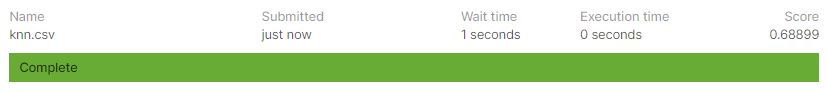

## Modelling with standardization

Here we standardize only the continuous variables, because the categorcal variable is already in the same range, say 0-1.

In [47]:
column_numerical=['Age','Fare']

In [48]:
ss=StandardScaler()
all_dummiess[column_numerical]=ss.fit_transform(all_dummiess[column_numerical])

In [49]:
all_dummiess.head()

,Survived,Age,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,-0.592481,0,-0.502445,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
1,1,0.638789,0,0.786845,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,1,-0.284663,0,-0.488854,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
3,1,0.407926,0,0.420730,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,0,0.407926,0,-0.486337,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1


We can see that the Age and Fare features are completely standardized

In [50]:
x_train=all_dummiess.iloc[:,1:]
y_train=all_dummiess.iloc[:,0]

Fitting the model

In [51]:
dct1=KNeighborsClassifier(n_neighbors=30)
dct1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30)

Preparing the test data

In [52]:
df_test_ss=pd.read_csv('F:/learning/kaggle/titanic/test.csv')
df_passenger_Id=df_test_ss.iloc[:,0]
df_test_ss=df_test_ss.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_test_ss[column_numerical]=ss.fit_transform(df_test_ss[column_numerical])
df_test_ss.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.298549,0,0,-0.497811,Q
1,3,female,1.181328,1,0,-0.512660,S
2,2,male,2.240662,0,0,-0.464532,Q
3,3,male,-0.231118,0,0,-0.482888,S
4,3,female,-0.584229,1,1,-0.417971,S


If we standardize the training data, we have to to standardization for the test data too. 
Otherwise the prediction will be absolutely incorrect.

In [53]:
df_test_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [54]:
df_test_ss['Age']=df_test_ss['Age'].fillna(df_test_ss['Age'].mean())
df_test_ss['Fare']=df_test_ss['Fare'].fillna(df_test_ss['Fare'].mean())
df_test_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [55]:
df_test_ss=pd.get_dummies(df_test_ss,columns=['Pclass','SibSp','Sex','Embarked'])
df_test_ss.head()

,Age,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.298549,0,-0.497811,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
1,1.181328,0,-0.512660,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
2,2.240662,0,-0.464532,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,-0.231118,0,-0.482888,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
4,-0.584229,1,-0.417971,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1


Prediction

In [56]:
y_pred_ss=dct1.predict(df_test_ss)

Our accuracy is around 76% without standardization of continuous variables

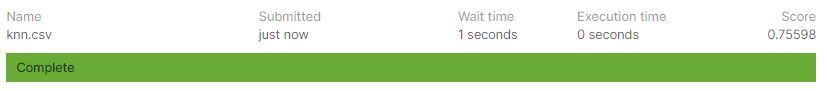

### Thus our result shows standardization improved the accuracy substantially. 
### Even without any hyperparameter tuning, our accuracy improved with simple standardization technique

Why do we need standardization?
When the two/more features are of different ranges say one is [0-100] and another is [0-10000], the distance based algorithms like KNN will fail to give equal mportance to all features.
The feature with large values will dominate the prediction. But all features must be given equal importance, so we standardize them.

Standardization will also enable models with gradient descent as its optimization algorithm to learn correctly and faster.